In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [58]:
# Aesthetic settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [14, 6]
plt.rcParams['font.size'] = 12

In [59]:
# Load California Housing Dataset
california = fetch_california_housing(as_frame=True)
df = california.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Dataset shape: (20640, 5)


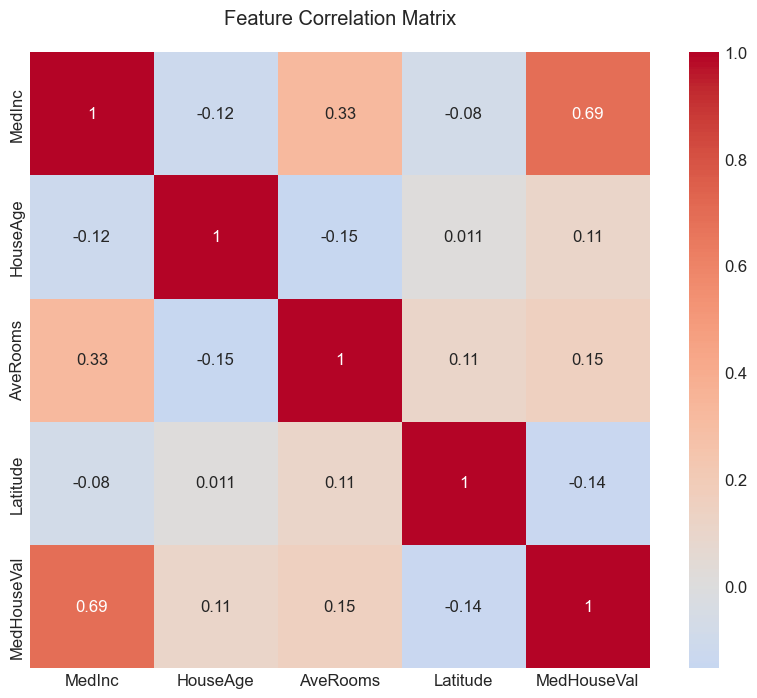

In [60]:
# Select features with strong linear correlation to target
df = df[['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'MedHouseVal']]
print(f"Dataset shape: {df.shape}")

# EDA: Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix', pad=20)
plt.show()

In [61]:
# Prepare data
X = df[['MedInc']]  # Median income (strongest predictor)
y = df['MedHouseVal']  # Median house value

In [70]:
print(f"Dataset contains {len(df)} samples")

Dataset contains 20640 samples


In [71]:
## 3. Build linear regression model
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = LinearRegression()
model.fit(X_train, y_train)

# Create prediction line for plotting (use DataFrame to maintain feature names)
x_plot = pd.DataFrame(np.linspace(X['MedInc'].min(), X['MedInc'].max(), 100), 
                     columns=['MedInc'])
y_plot = model.predict(x_plot)

# Calculate metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

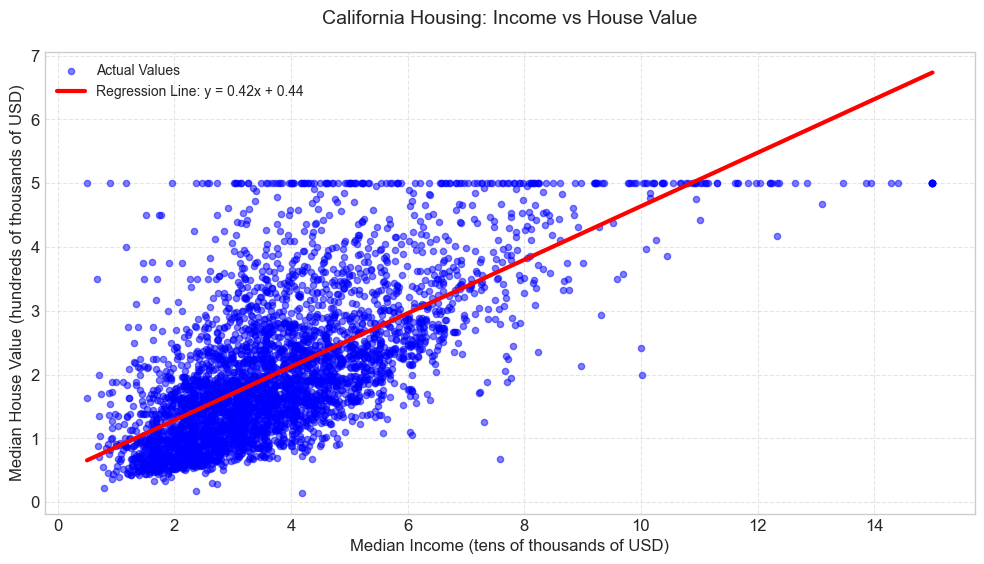

Linear Regression Results:


,Parameter,Value,Interpretation
0,Slope (Income coefficient),0.419338,Price increases by $41.93K per $10K income increase
1,Intercept,0.444597,Base value $44.46K at zero income
2,MSE,0.709116,Average squared error: 0.7091
3,R²,0.458859,Model explains 45.9% of variance


In [72]:
# Create figure
plt.figure(figsize=(12, 6))

# Scatter plot of actual test data
plt.scatter(X_test, y_test, color='blue', alpha=0.5, s=20, label='Actual Values')

# Regression line
plt.plot(x_plot, y_plot, color='red', linewidth=3,
        label=f'Regression Line: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')

plt.xlabel('Median Income (tens of thousands of USD)', fontsize=12)
plt.ylabel('Median House Value (hundreds of thousands of USD)', fontsize=12)
plt.title('California Housing: Income vs House Value', fontsize=14, pad=20)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Results table
results = pd.DataFrame({
    'Parameter': ['Slope (Income coefficient)', 'Intercept', 'MSE', 'R²'],
    'Value': [model.coef_[0], model.intercept_, mse, r2],
    'Interpretation': [
        f'Price increases by ${model.coef_[0]*100:.2f}K per $10K income increase',
        f'Base value ${model.intercept_*100:.2f}K at zero income',
        f'Average squared error: {mse:.4f}',
        f'Model explains {r2*100:.1f}% of variance'
    ]
})

print("Linear Regression Results:")
display(results.style.set_properties(**{
    'background-color': '#f8f9fa',
    'border': '1px solid #dee2e6',
    'padding': '8px',
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#343a40'), ('color', 'white')]
}]))

In [ ]:
# Finish